# Laboratorul 7

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

## Exercițiul 1

Care este **frecvența de eșantionare** a semnalului de trafic? (revedeți secțiunea pentru detalii despre cum a fost achiziționat acesta)

In [34]:
# Semnalul a fost măsurat din oră în oră, deci frecvența de eșantionare este 1 eșantion / oră (= 1 / (3600 secunde))

## Exercițiul 2

Ce **interval de timp** acoperă eșantioanele din fișier?

In [35]:
numar_esantioane = 18288
perioada_esantionare = 1 # oră
interval_de_timp = numar_esantioane * perioada_esantionare

print("Eșantioanele acoperă o perioadă de", interval_de_timp, "ore, adică", interval_de_timp // 24, "zile")

Eșantioanele acoperă o perioadă de 18288 ore, adică 762 zile


## Exercițiul 3

Presupunând că semnalul a fost eșantionat **corect** (fără aliere) și **optim**, care este **frecvența maximă** prezentă în semnal?

In [36]:
# Dacă presupunem că semnalul a fost eșantionat corect, înseamnă că se aplică inegalitatea din teorema Nyquist:
# f_s >= 2 * f_{max}
# Deoarece eșantionarea este făcută optim (nu se rețin mai multe eșantioane decât este strict necesar),
# f_s = 2 * f_{max}
# Deci frecvența maximă este 1 / (7200 secunde)

## Exercițiul 4

Utilizați funcția `np.fft.rfft(x)` pentru a calcula **transformata Fourier** a semnalului și afișați grafic **modulul transformatei**.

Deoarece valorile pe care le veți calcula sunt în Hz, este important să definiți corect frecvența de eșantionare (astfel încât valorile de frecvențe pe care le obțineți utilizând ultima secvență de cod din ghidul Python din îndrumar să aibă o interpretare corectă din punct de vedere fizic).

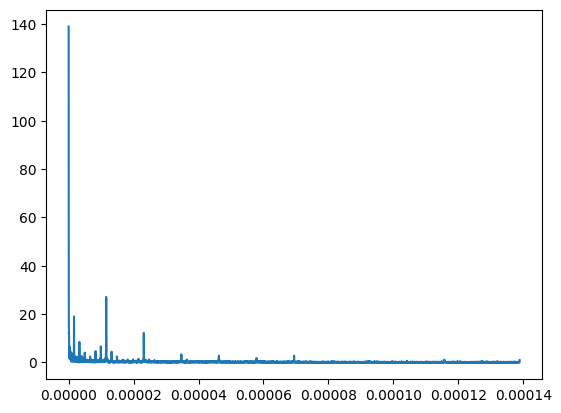

In [37]:
date_trafic = np.genfromtxt("traffic.csv")

N = len(date_trafic)

X = np.fft.rfft(date_trafic)

X = np.abs(X/N)

Fs = 1/3600
freqs = Fs * np.linspace(0, N//2, N//2 + 1) / N

plt.plot(freqs, abs(X))
plt.show()

## Exercițiul 5

Prezintă acest semnal o **componentă continuă**? Dacă da, eliminați-o și afișați semnalul rezultat. Dacă nu, specificați cum ați determinat acest fapt.

Valoarea componentei continue: 138.95811461067368


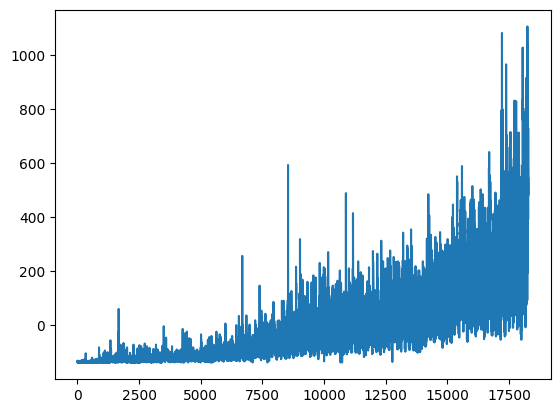

In [38]:
print("Valoarea componentei continue:", X[0])

semnal_fara_componenta_continua = date_trafic - X[0]

plt.plot(semnal_fara_componenta_continua)
plt.show()

## Exercițiul 6

Care sunt frecvențele principale conținute în semnal, așa cum apar ele în transformata Fourier? Mai exact, determinați **primele 4 cele mai mari valori** ale modulului transformatei și specificați căror frecvențe (în Hz) le corespund. Căror fenomene periodice din semnal se asociază fiecare?

In [39]:
indici_frecvente_de_top = np.argsort(abs(X))[:-5:-1]

for index in indici_frecvente_de_top:
    frecv = freqs[index]
    print(frecv, "Hz")
    if frecv != 0.0:
        print("Perioadă de", (1 / frecv) / 3600, "ore")

# Se poate vedea că, de exemplu, a patra ce mai mare frecvență din semnal corespunde la o perioadă de 24 de ore,
# adică o componentă a semnalului are periodicitate de 24 de ore.

0.0 Hz
1.518907358802372e-08 Hz
Perioadă de 18288.0 ore
3.037814717604744e-08 Hz
Perioadă de 9144.0 ore
1.1574074074074073e-05 Hz
Perioadă de 24.0 ore


## Exercițiul 7

Începând de la un eșantion ales de voi (după cel al 1000-lea), reprezentați, pe un grafic separat, **o lună de trafic**. Alegeți eșantionul de start astfel încât reprezentarea să înceapă într-o **zi de luni**.

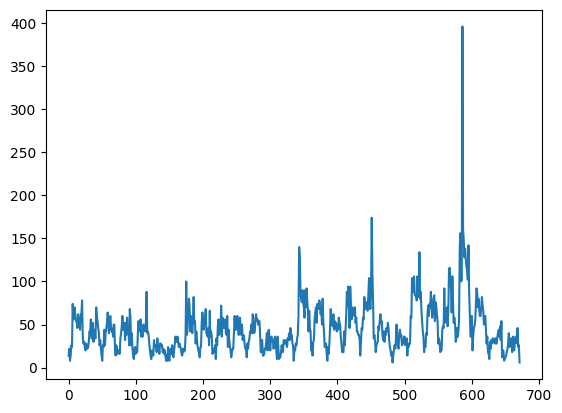

In [40]:
index_start = 6100

fereastra = date_trafic[index_start:index_start + 24 * 7 * 4]

# Am căutat vizual o perioadă de aproximativ o lună care să înceapă cu 5 vârfuri medii
# (reprezentând zilele de lucru) și apoi două vârfuri scăzute (reprezentând weekend-ul).
plt.plot(fereastra)
plt.show()

## Exercițiul 8

Nu se cunoaște data la care a început măsurarea acestui semnal. Concepeți o **metodă** (descrieți în cuvinte) prin care să determinați, doar analizând semnalul în timp, această dată. Comentați ce neajunsuri ar putea avea soluția propusă și care sunt factorii de care depinde acuratețea ei.

La fel cum am putut identifica vizual zilele săptămânii pentru exercițiul anterior, am putea identifica și anumite evenimente cu o periodicitate mai mare.

Spike-urile individuale pot reprezenta zile de sărbătoare. Ar putea exista și o periodicitate dată de anotimpuri sau de activitatea umană: de exemplu, în timpul vacanței de vară și a celei de iarnă, traficul ar fi mai redus, iar în septembrie o să fie trafic crescut pentru că începe școala etc.

Această metodă ar fi mai precisă dacă am avea date de trafic pe mai mult de doi ani. În același timp, nu ar putea să ne spună neapărat în ce deceniu a fost făcută măsurătoarea, deoarece aceste evenimente periodice există de mult timp.